<a href="https://colab.research.google.com/github/Infinity2959N/ML/blob/main/AQI_using_ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load required libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

### AQI Using LinReg

### Downloading the dataset

In [2]:
file_id = '1f2E4yY9jmZlgRFirp0vSWPx1DlSYJ6ie'

url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(url, 'AQI_Data.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1f2E4yY9jmZlgRFirp0vSWPx1DlSYJ6ie
To: /content/AQI_Data.csv
100%|██████████| 61.9k/61.9k [00:00<00:00, 48.5MB/s]


'AQI_Data.csv'

In [3]:
df= pd.read_csv('AQI_Data.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


## EDA

In [4]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [5]:
df.isna().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,1


In [6]:
# Drop the row with missing PM 2.5 values
df = df.dropna(subset=['PM 2.5'])


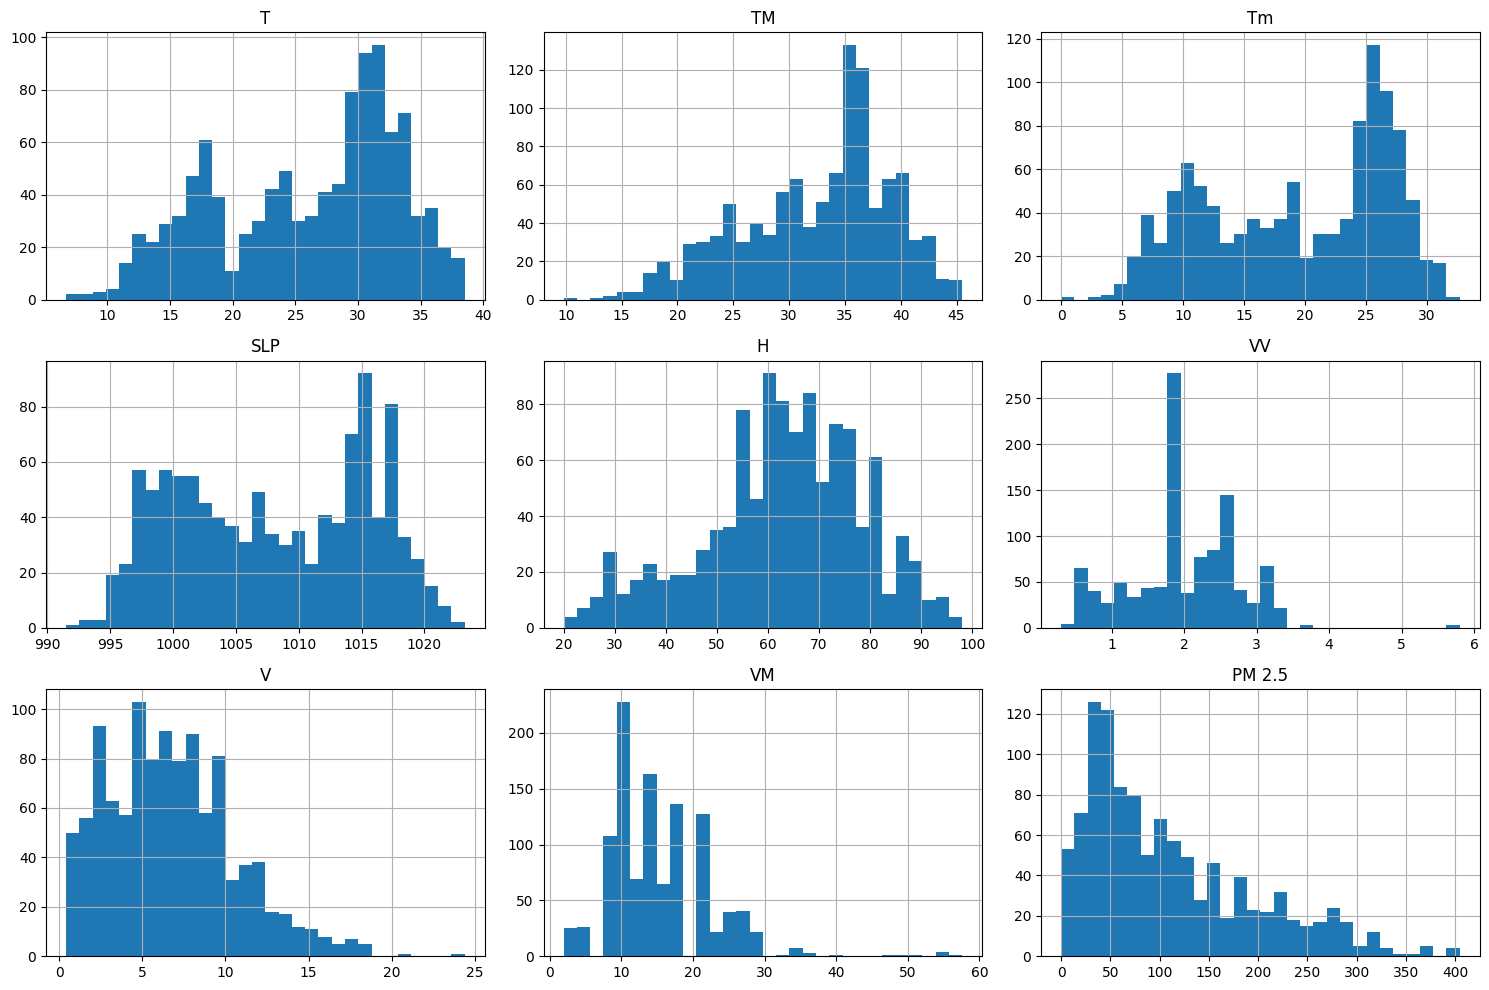

In [7]:
# Plotting histograms for each column
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

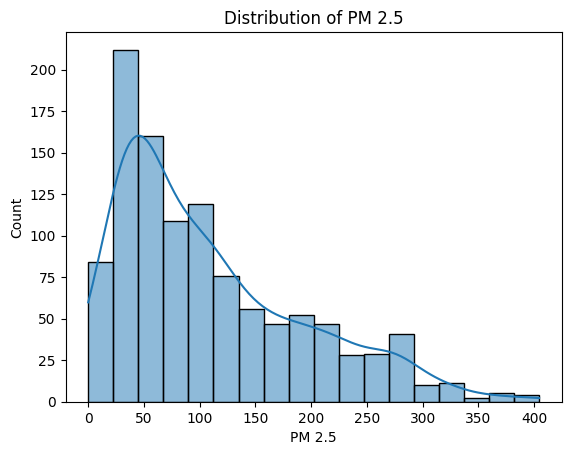

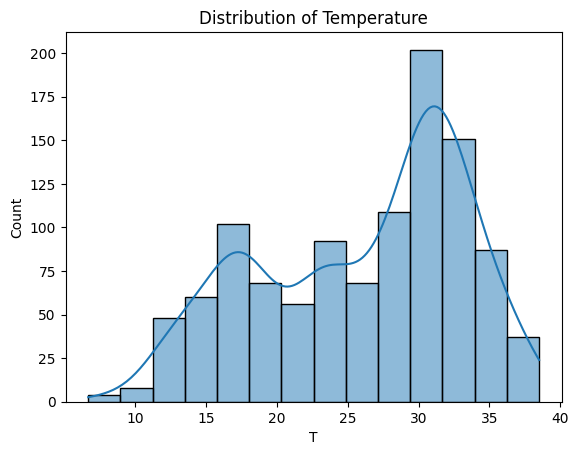

In [8]:
# PM 2.5 Distribution
sns.histplot(df['PM 2.5'], kde=True)
plt.title('Distribution of PM 2.5')
plt.show()

# Temperature Distribution
sns.histplot(df['T'], kde=True)
plt.title('Distribution of Temperature')
plt.show()

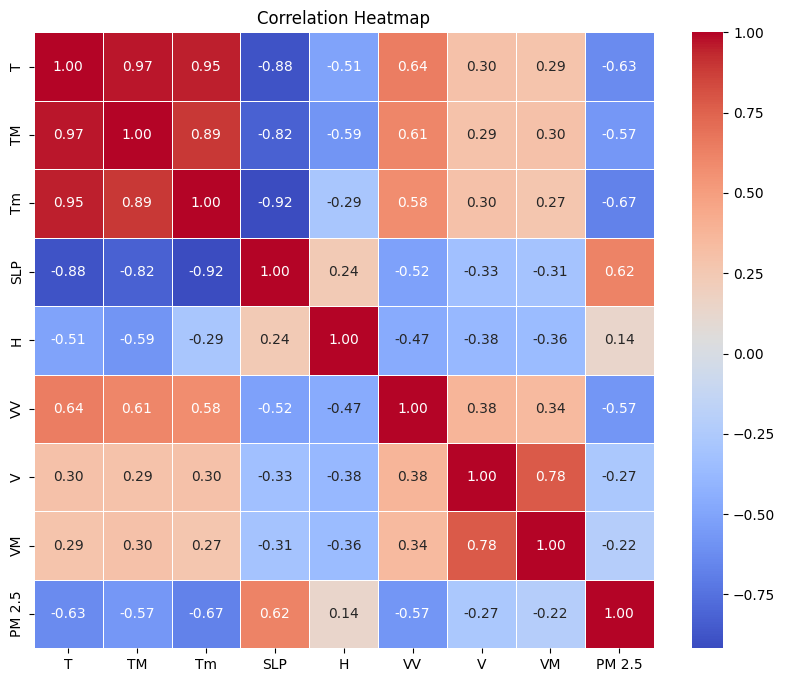

In [9]:
# Calculate correlation matrix
corr = df.corr()

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


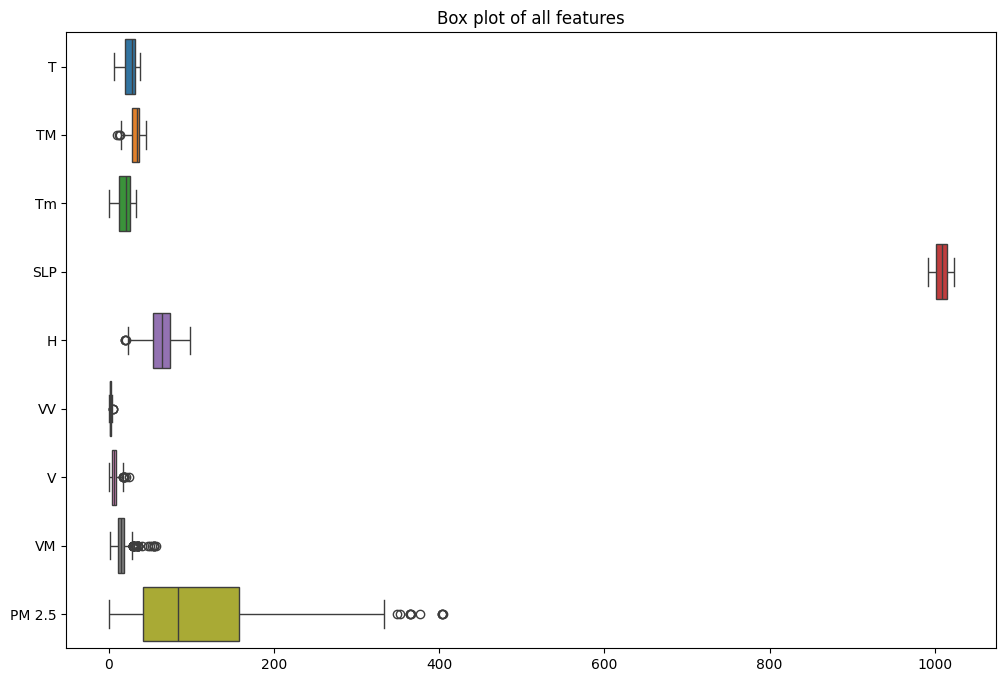

In [10]:
# Checking for outliers

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box plot of all features')
plt.show()

## Preparing the dataset

I decided not to do feature engineering on this dataset to keep it simple, but PM 2.5 requires some attention, especially regarding the outliers. I would also suggest log transform on pm 2.5 to improve the skewedness, but i am not doing it

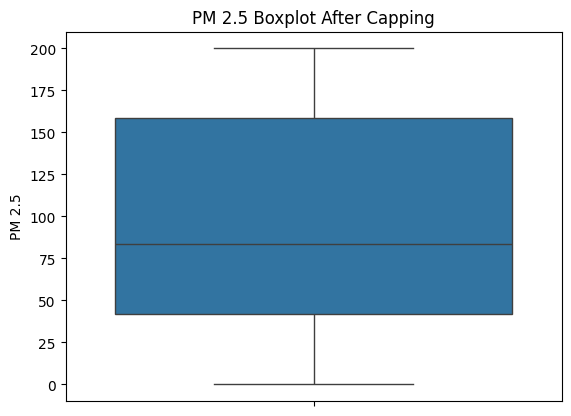

In [11]:
# Cap values at a threshold, e.g., 200 or 350
threshold = 200
df['PM 2.5'] = df['PM 2.5'].clip(upper=threshold)

# Check if capping was successful
sns.boxplot(df['PM 2.5'])
plt.title('PM 2.5 Boxplot After Capping')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X = df.drop(columns=['PM 2.5'])
y = df['PM 2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Design and training of the model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1862.2139271904073
R-squared: 0.505902865754955


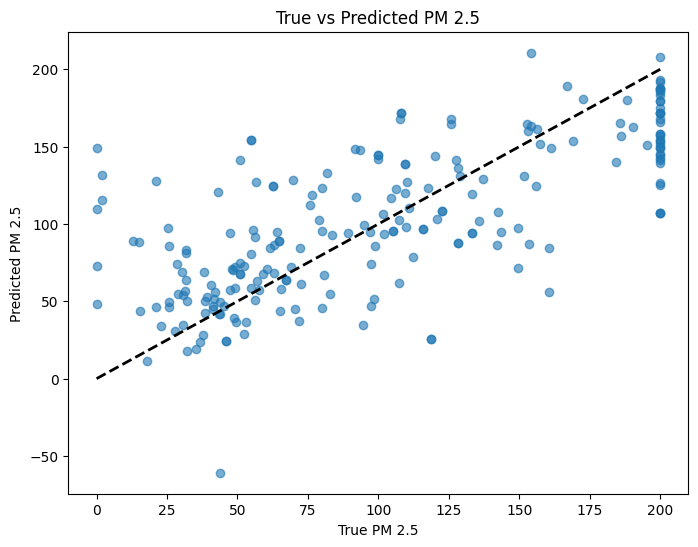

In [14]:
#As expected, Linear regression isn't fit for this data

#Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True PM 2.5')
plt.ylabel('Predicted PM 2.5')
plt.title('True vs Predicted PM 2.5')
plt.show()


## Trying Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")


Random Forest Mean Squared Error: 740.6572578210992
Random Forest R-squared: 0.8034830353248774


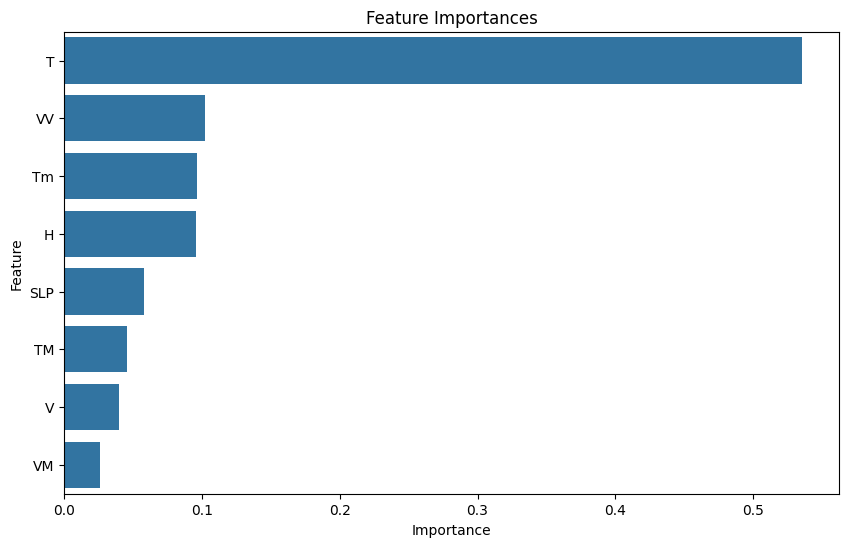

In [16]:
#Feature importance
feature_importances = rf_model.feature_importances_

# DataFrame to view the importance of each feature
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances')
plt.show()


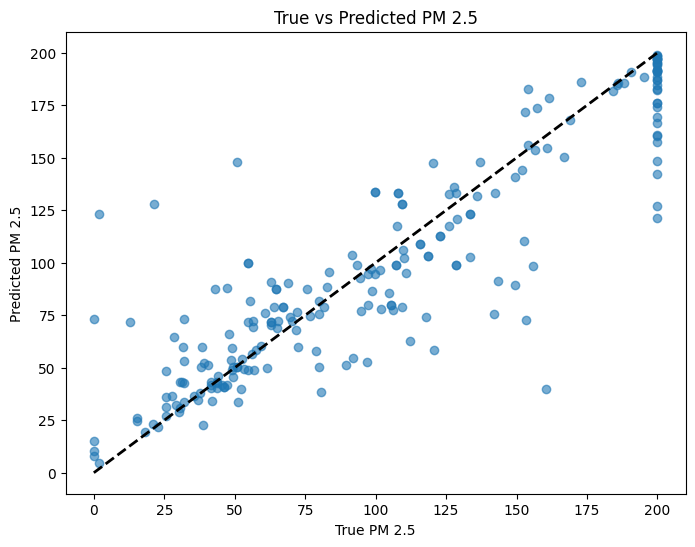

In [17]:
#Plotting the results

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True PM 2.5')
plt.ylabel('Predicted PM 2.5')
plt.title('True vs Predicted PM 2.5')
plt.show()


## Inference

Linear Regression gave an MSE of 1862 (RMSE 43) which, though not very bad, isn't good either, and as the data didn't have a straightforeard linear relation, it was expected.

Random Forest however performed quite well comparatively, with a MSE of 740 (RMSE 27).

To keep this project simple, I have decided to leave it till here and consider random forest as my final submission with RMSE 27